<a href="https://colab.research.google.com/github/syarifuddin22/pakcoy-diseases-detection/blob/main/Syarif_TA_fiks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/TA/databaru/train'
valid_path = '/content/drive/MyDrive/TA/databaru/test'

In [ ]:

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
train_dir = glob('/content/drive/MyDrive/TA/databaru/train*')

In [ ]:
train_dir


['/content/drive/MyDrive/TA/databaru/train']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(train_dir), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# tell the model what cost and optimization method to use
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (224,224,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.1),                                                  #menambahkan dropout
  tf.keras.layers.Dense(4, activation= 'softmax')
])
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from numpy.ma.core import resize
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math, os, sys
from skimage.io import imsave, imread

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)



In [ ]:
# view the structure of the model

def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/TA/databaru/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1263 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/TA/databaru/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 30 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch= len(training_set),
  validation_steps= len(test_set)
)

Epoch 1/100
40/40 [==============================] - 145s 4s/step - loss: 1.1673 - accuracy: 0.4933 - val_loss: 2.0096 - val_accuracy: 0.0333
Epoch 2/100
40/40 [==============================] - 127s 3s/step - loss: 0.6475 - accuracy: 0.6888 - val_loss: 5.5900 - val_accuracy: 0.3000
Epoch 3/100
40/40 [==============================] - 130s 3s/step - loss: 0.4793 - accuracy: 0.8013 - val_loss: 6.8237 - val_accuracy: 0.4333
Epoch 4/100
40/40 [==============================] - 130s 3s/step - loss: 0.3060 - accuracy: 0.8757 - val_loss: 8.4648 - val_accuracy: 0.4000
Epoch 5/100
40/40 [==============================] - 128s 3s/step - loss: 0.2685 - accuracy: 0.9097 - val_loss: 6.8231 - val_accuracy: 0.3333
Epoch 6/100
40/40 [==============================] - 126s 3s/step - loss: 0.2040 - accuracy: 0.9287 - val_loss: 12.5063 - val_accuracy: 0.4667
Epoch 7/100
40/40 [==============================] - 126s 3s/step - loss: 0.1070 - accuracy: 0.9636 - val_loss: 12.0120 - val_accuracy: 0.4667
Epoc

UnknownError: ignored

In [ ]:
# plot the loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: ignored

In [ ]:
training_set.class_indices

{'backmoth': 0, 'healthy': 1, 'leafminer': 2, 'mildew': 3}

In [ ]:
def get_confusion_matrix(model, validation_generator):
    is_binary = len(validation_generator.class_indices) == 2
    all_predictions = np.array([])
    all_labels = np.array([])
    for i in range(len(validation_generator)):
        x_batch, y_batch = validation_generator[i]
        predictions = model.predict(x_batch)
        if (not is_binary):
            predictions = np.argmax(predictions, axis=1)
        else:
            predictions = (predictions > .5) * 1
        all_predictions = np.concatenate([all_predictions, predictions])

        if (not is_binary):
            labels = np.argmax(y_batch, axis = 1)
        else:
            labels = y_batch
        all_labels = np.concatenate([all_labels, labels])

    return tf.math.confusion_matrix(all_predictions, all_labels)

In [ ]:
model.evaluate(test_set)

1/1 [==============================] - 2s 2s/step - loss: 45.2036 - accuracy: 0.4333


[45.20363235473633, 0.4333333373069763]

<ipython-input-27-2a2e21bfbb21>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, 7)


[[2 0 1 2]
 [3 3 1 0]
 [0 3 3 3]
 [2 2 3 2]]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.38      0.43      0.40         7
           2       0.38      0.33      0.35         9
           3       0.29      0.22      0.25         9

    accuracy                           0.33        30
   macro avg       0.33      0.35      0.33        30
weighted avg       0.33      0.33      0.33        30



ValueError: ignored

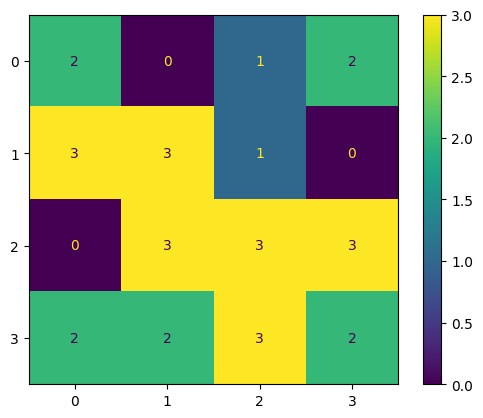

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Y_pred = model.predict_generator(test_set, 7)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_set.classes, y_pred)
print(cm)
print(classification_report(test_set.classes, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Y_pred = model.predict_generator(test_data, 7)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_data.classes, y_pred)
print(cm)
print(classification_report(test_data.classes, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.classes)
disp.plot()
# plt.show()

NameError: ignored

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  print(pred)

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 22ms/step
[[3.0993288e-09 1.8263415e-15 9.9993217e-01 6.7844943e-05]]


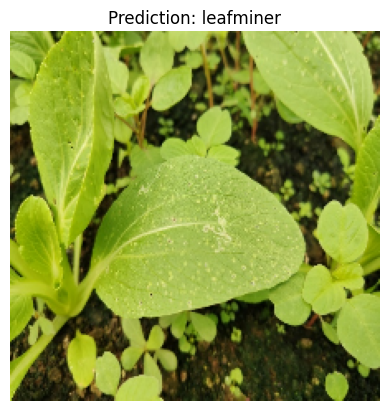

In [ ]:
pred_and_plot(model, "/content/drive/MyDrive/Leafminer83.jpg", class_names)

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/TA/data/test/backmoth/Backmoth1.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf
tf.__version__